# MPG dataset analysis and prediction

Your task is to analyze the mpg dataset using techniques learned in the course and create a multiple linear regression model to predict `mpg` (miles per gallon).

The notebook consists of two parts:

  1. Analyzing the data (summary statistics and graphical analysis).
  2. Creating a multiple linear regression model.
  
In comparison with the course, there are two new concepts:
  1. Dummy variables for categorical attributes.
  2. Mean absolute error (MAE).
  
These concepts will be explained in the appropriate sections.





### Data Description

The data we are using is modified [auto mpg](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset taken from UCI repository.

Information regarding data<br>
&emsp;&emsp;&emsp;&emsp;**Title:** Auto-Mpg Data<br>
&emsp;&emsp;&emsp;&emsp;**Number of Instances:** 398<br>
&emsp;&emsp;&emsp;&emsp;**Number of Attributes:** 7 <br>
&emsp;&emsp;&emsp;&emsp;**Attribute Information:**

    1. mpg:           continuous
    2. displacement:  continuous
    3. horsepower:    continuous
    4. weight:        continuous
    5. model year:    multi-valued discrete
    6. origin:        multi-valued discrete
    
All the attributes are self-explanatory, except (maybe) displacement. ([definition](https://en.wikipedia.org/wiki/Engine_displacement)).

### Tasks

1. Load CSV data into a pandas DataFrame.
2. Explore data:
   * Specify which variables are numerical and which are categorical variables.
   * Calculate number of unique values for each variable.
   * Detect missing values (`NaN` values).
3. If there are any `NaN` values, filter them out.






### Hints

1. As there are too few observations for the `model_year` variable, it can be analyzed as a categorical variable.
2. A useful method for the description of data types is `.info()`.


In [ ]:
# import all necessary libraries
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm



We will first import the data into a pandas dataframe and inspect it's properties.

In [ ]:
# Load the dataset from the
df = pd.read_csv("https://gist.githubusercontent.com/Ruzejjur/7c3507e8e99a1013658db5f5eace3d33/raw/a86c1ac1e377fa9609109816df8942f13d2f327c/gistfile1.txt")

# Display the first few rows of the dataset
df.head()


,mpg,displacement,horsepower,weight,model_year,origin
0,18.0,307.0,130.0,3504,70,usa
1,15.0,350.0,165.0,3693,70,usa
2,18.0,318.0,150.0,3436,70,usa
3,16.0,304.0,150.0,3433,70,usa
4,17.0,302.0,140.0,3449,70,usa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   model_year    398 non-null    int64  
 5   origin        398 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 18.8+ KB


In [ ]:
df = df.dropna()

# Analysis of variables

Analyze the categorical and numerical variables separately.

## Analysis of categorical variables


### Tasks

1. Subset the dataset only for the categorical variables.
2. Explore unique values of these variables.
3. Calculate summary statistics for those categorical variables which are numeric:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
4. Create graphical analysis of the categorical variables:
   * Create a count plot for each categorical variable (use `sns.countplot()`).
5. Describe the insights from the analysis:
   * Is the dataset balanced with respect to individual categories?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.
2. We would like the data to be evenly represented across categories (i.e., uniformly distributed). Are the data uniformly distributed across the categories?


In [ ]:
#df[["mpg",	"displacement",	"horsepower",	"weight",	"model_year", "origin"]]
df2 = df[["model_year", "origin"]]

In [ ]:
df2.describe(include='all')

,model_year,origin
count,392.000000,392
unique,NaN,3
top,NaN,usa
freq,NaN,245
mean,75.979592,NaN
std,3.683737,NaN
min,70.000000,NaN
25%,73.000000,NaN
50%,76.000000,NaN
75%,79.000000,NaN


<Axes: xlabel='count', ylabel='origin'>

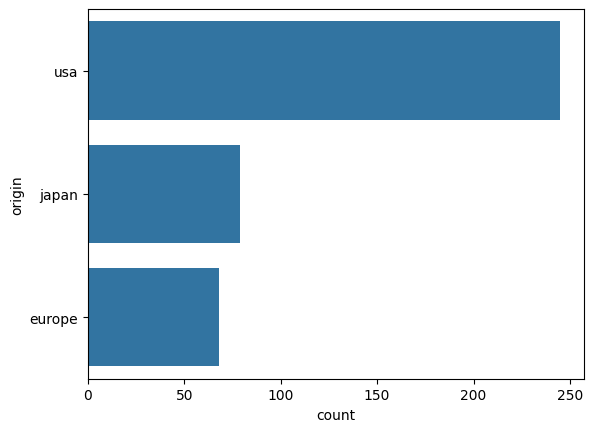

In [ ]:
sns.countplot(data = df2['origin'])


<Axes: ylabel='count'>

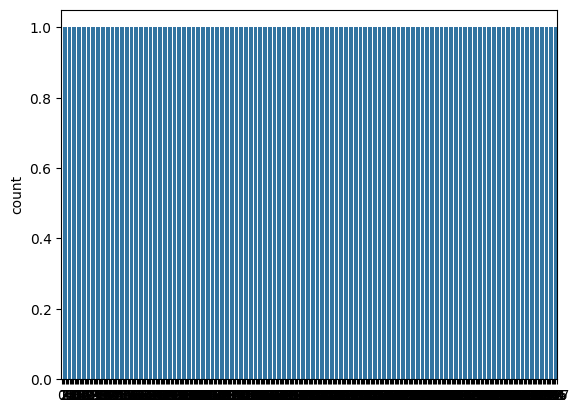

In [ ]:
sns.countplot(data = df2['model_year'])

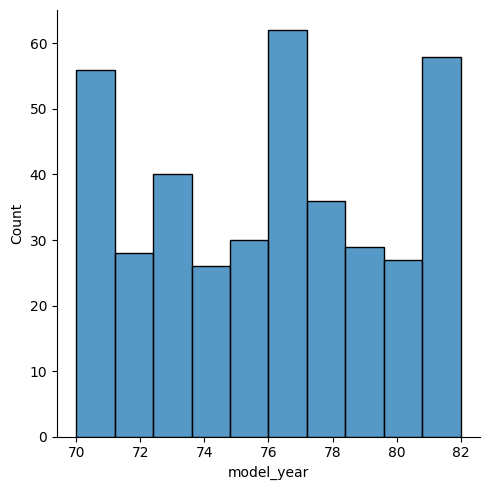

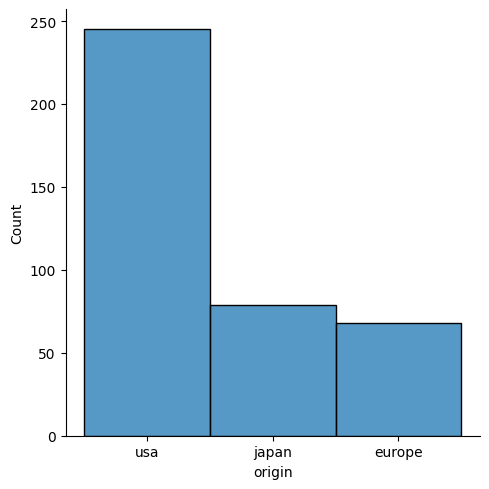

In [ ]:

sns.displot(df2, x = "model_year")
sns.displot(df2, x = "origin")

## Analysis on Numerical Attributes

### Tasks

1. Subset the dataset only for the numerical variables.
2. Calculate summary statistics for these variables:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
3. Create graphical analysis of the numeric variables:
   * Create one (or more) of the following plots for each numeric variable:
      * Histogram (`sns.histplot()`)
      * Box plot (`sns.boxplot()`)
      * Violin plot (`sns.violinplot()`)
4. Analyze the relationships between individual numerical variables:
   * Use `sns.pairplot()`.
5. Describe the insights from the analysis:
   * Describe the distribution of individual numeric variables.
   * Are there any linear relationships between the numeric variables?
     * For example: If the weight increases, does the horsepower increase/decrease?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.


In [ ]:
df3 = df[["mpg",	"displacement",	"horsepower",	"weight"]]
df3.describe()

,mpg,displacement,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184
std,7.805007,104.644004,38.491160,849.402560
min,9.000000,68.000000,46.000000,1613.000000
25%,17.000000,105.000000,75.000000,2225.250000
50%,22.750000,151.000000,93.500000,2803.500000
75%,29.000000,275.750000,126.000000,3614.750000
max,46.600000,455.000000,230.000000,5140.000000


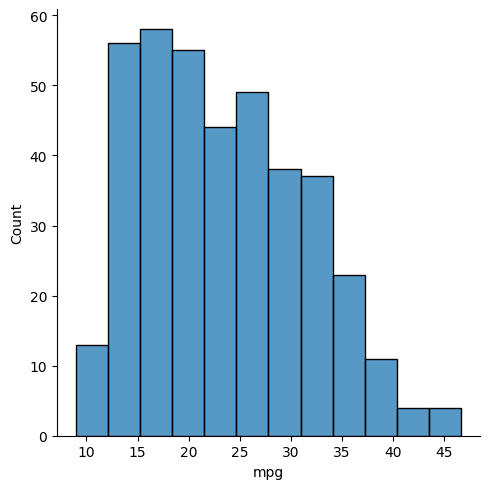

In [ ]:
sns.displot(df3, x = "mpg")

<Axes: xlabel='displacement'>

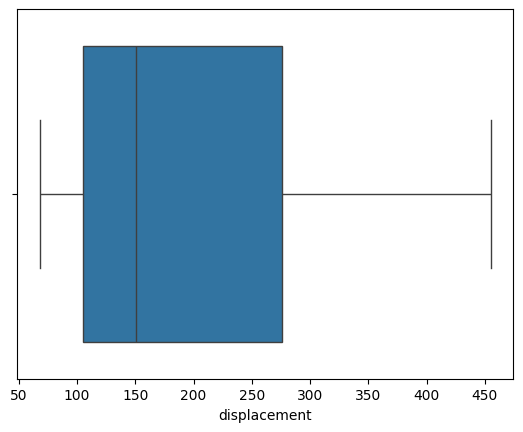

In [ ]:
sns.boxplot(df3, x = "displacement")

<Axes: xlabel='horsepower'>

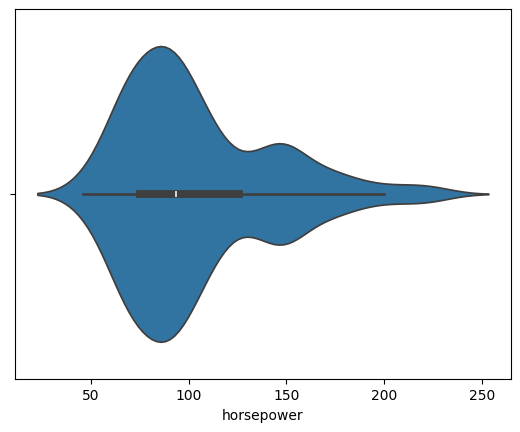

In [ ]:
sns.violinplot(df3, x = "horsepower")

<Axes: xlabel='weight'>

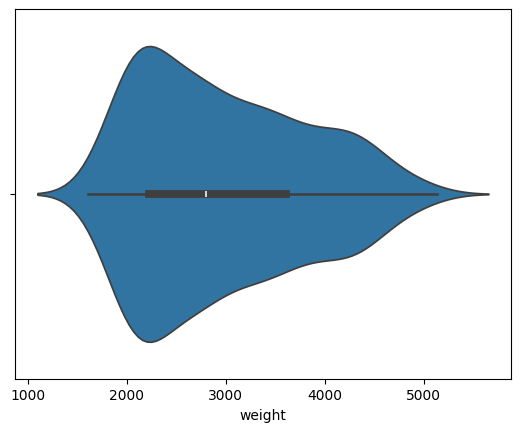

In [ ]:
sns.violinplot(df3, x = "weight")

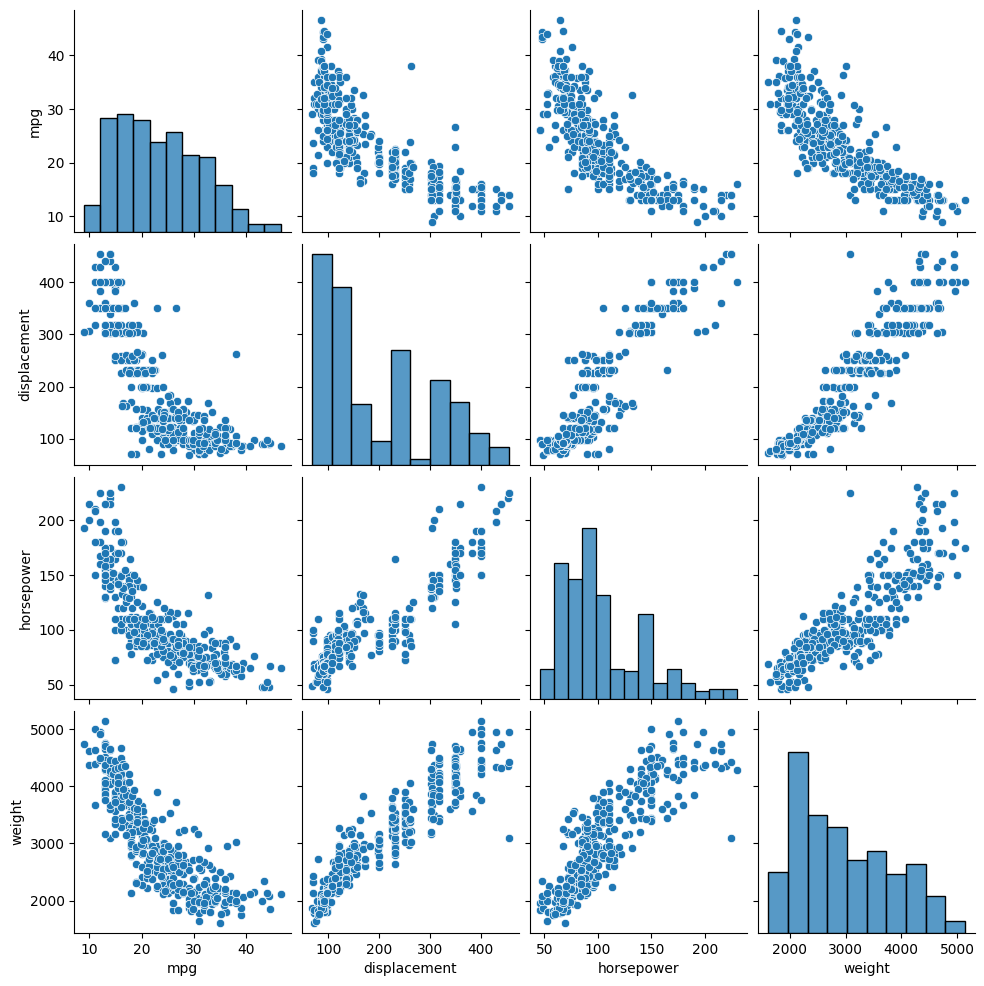

In [ ]:
sns.pairplot(df3)

Linear relationship can be observed between those variables:
weight:horespower, weight:displacement

probably non-linear, but relation is between: mpg:weight, mpg:horsepower, mpg:dispacement,

thohe data are not normaly-distributed - they're shifted to the left

## Analysis of categorical vs. numerical variables



### Tasks

1. Work with the original dataset (containing both categorical and numeric variables).
2. Explore the relationship between categorical variables and numeric variables:
   * Create boxen plots of categorical vs. numerical variables for each variable (use `sns.boxenplot()`).
3. (Optional) Create a violin plot of categorical vs. numerical variables for each variable (use `sns.violinplot()`).
4. Create a line plot of `model_year` vs. individual numerical variables.
5. Describe what you found from the plots in tasks 2, 3, and 4.


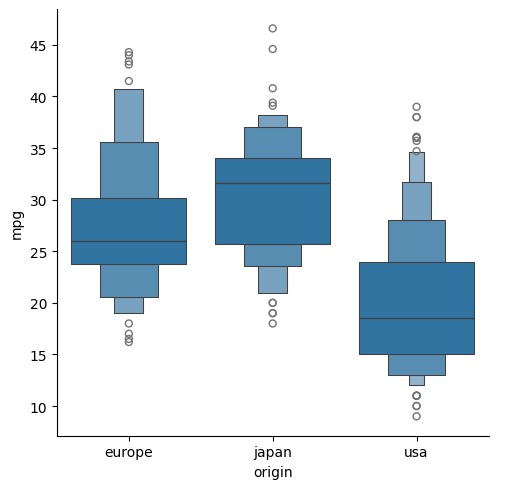

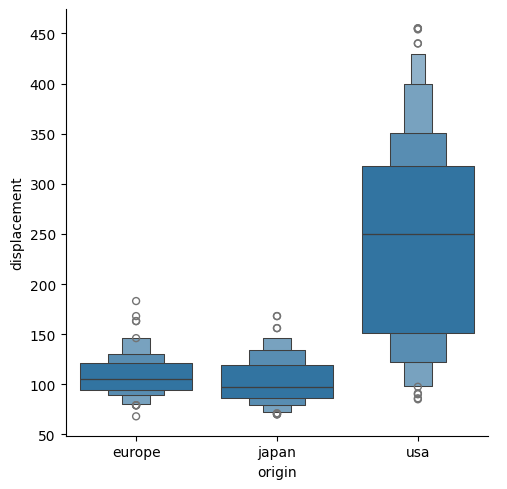

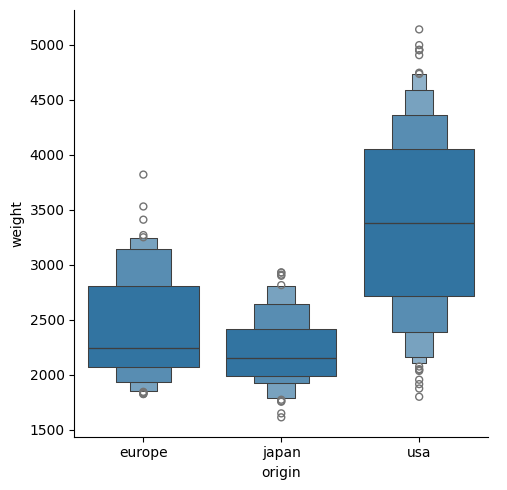

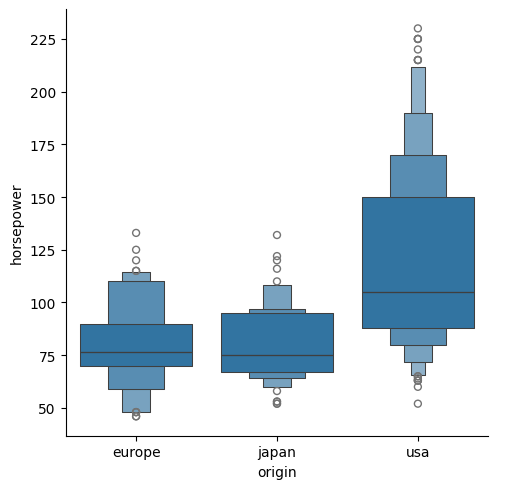

In [ ]:
df4 = df
sns.catplot(
    data=df4.sort_values("origin"),
    x="origin", y="mpg", kind="boxen",
)

sns.catplot(
    data=df4.sort_values("origin"),
    x="origin", y="displacement", kind="boxen",
)

sns.catplot(
    data=df4.sort_values("origin"),
    x="origin", y="weight", kind="boxen",
)

sns.catplot(
    data=df4.sort_values("origin"),
    x="origin", y="horsepower", kind="boxen",
)

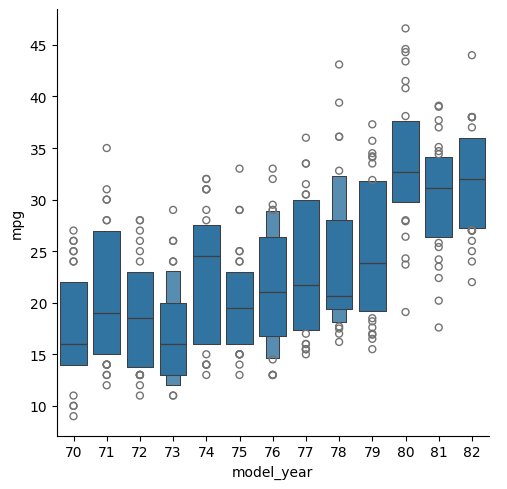

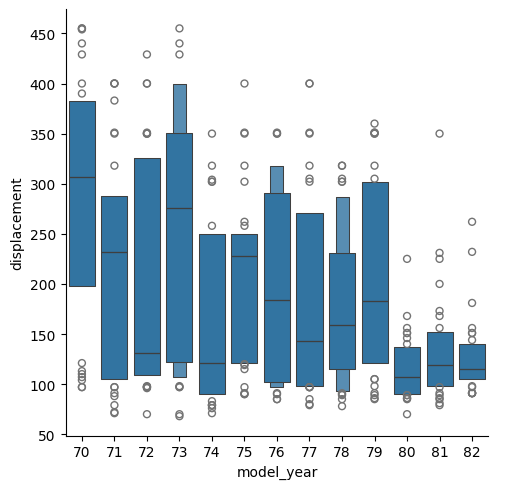

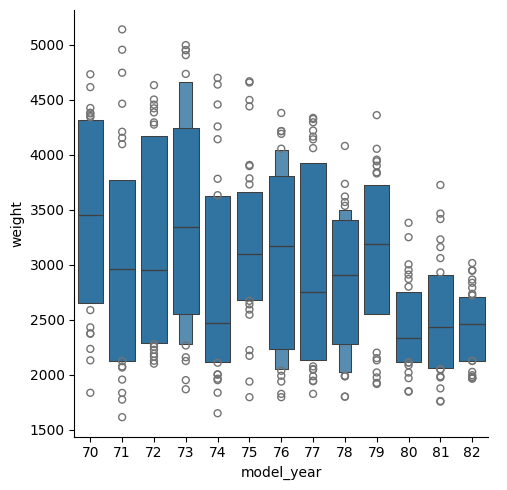

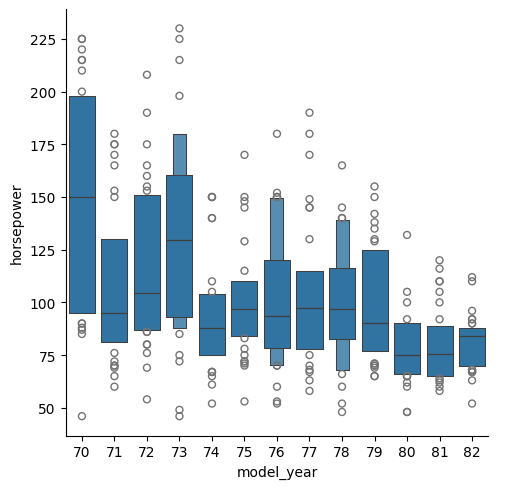

In [ ]:
sns.catplot(
    data=df4.sort_values("model_year"),
    x="model_year", y="mpg", kind="boxen",
)

sns.catplot(
    data=df4.sort_values("model_year"),
    x="model_year", y="displacement", kind="boxen",
)

sns.catplot(
    data=df4.sort_values("model_year"),
    x="model_year", y="weight", kind="boxen",
)

sns.catplot(
    data=df4.sort_values("model_year"),
    x="model_year", y="horsepower", kind="boxen",
)


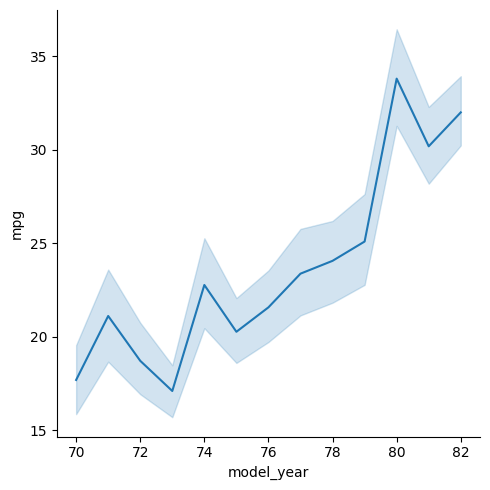

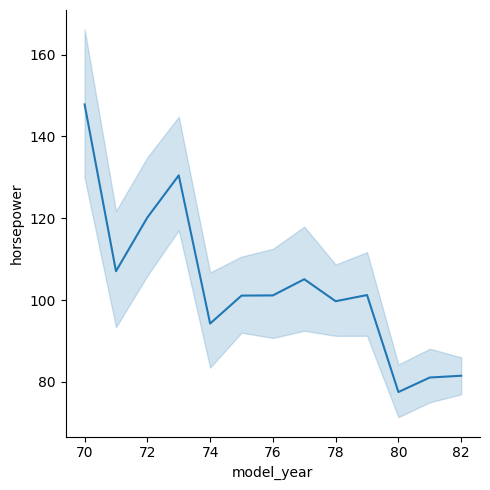

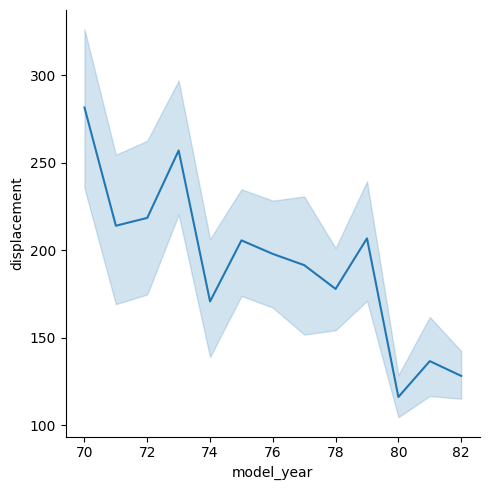

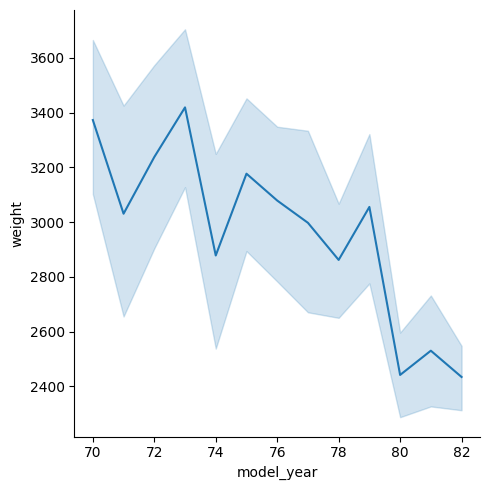

In [ ]:
sns.relplot(data=df4, x="model_year", y="mpg", kind="line")



sns.relplot(data=df4, x="model_year", y="horsepower", kind="line")
sns.relplot(data=df4, x="model_year", y="displacement", kind="line")
sns.relplot(data=df4, x="model_year", y="weight", kind="line")



The mean of mpg is shifted for
The USA have the least miles per hour compared to other counties and the Japan have the highest consumption of fuel per mile.
Cars form USA  are the least efficient in fuel usage(they have higher displacement than cars from Europe and Japan, and those values are widely distributed).
Cars from USA weigh more than European and Japanese ones. Weight of Japanese cars are the most uniformed.
Cars form USA have the highest horsepower.
New cars are more efficient in fuel usage.
There is a tendency to lower the displacement, horsepower and weight over the years.

# Prediction model

### Tasks

Create a multivariable regression model based on the variables in the dataset for prediction of `mpg` based on all other variables.

1. Separate the dependent and independent variables:
   * Name the independent variables dataframe `X`.
   * Name the dependent variable `Y`.
2. Convert any categorical variables into dummy variables (for explanation see hints) using (you can copy the code into the code block):

```python
# Convert the categorical variables into dummy variables

# Define names of columns to be converted to dummy varaibles
cat_columns_to_be_converted = np.array([])

# Modify the X dataframe of independent variables
X = pd.get_dummies(X, columns=cat_columns_to_be_converted, drop_first=True)

# Convert dummy columns to int as the sm.OLS() requires numerical variables

# For each column in the dataframe
for col in X.columns:
  # Check if the column type is boolean
    if X[col].dtype == 'bool':
      # if yes make it 0 or 1
        X[col] = X[col].astype(int)


In [ ]:
import statsmodels.api as sm

# Prepare the data for multiple regression
#mpg = df["mpg"]
#displacement = df['displacement']
#horsepower = df['horsepower']
#weight = df['weight']
#origin = df['origin']
#model_year = df['model_year']

X = df[['displacement', 'horsepower', 'weight', 'origin', 'model_year']]
Y = df[['mpg']]
# Convert the categorical variables into dummy variables

# Define names of columns to be converted to dummy varaibles
cat_columns_to_be_converted = np.array(["origin", "model_year"])

# Modify the X dataframe of independent variables
X = pd.get_dummies(X, columns=cat_columns_to_be_converted, drop_first=True)

# Convert dummy columns to int as the sm.OLS() requires numerical variables

# For each column in the dataframe
for col in X.columns:
  # Check if the column type is boolean
    if X[col].dtype == 'bool':
      # if yes make it 0 or 1
        X[col] = X[col].astype(int)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   displacement   392 non-null    float64
 1   horsepower     392 non-null    float64
 2   weight         392 non-null    int64  
 3   origin_japan   392 non-null    int64  
 4   origin_usa     392 non-null    int64  
 5   model_year_71  392 non-null    int64  
 6   model_year_72  392 non-null    int64  
 7   model_year_73  392 non-null    int64  
 8   model_year_74  392 non-null    int64  
 9   model_year_75  392 non-null    int64  
 10  model_year_76  392 non-null    int64  
 11  model_year_77  392 non-null    int64  
 12  model_year_78  392 non-null    int64  
 13  model_year_79  392 non-null    int64  
 14  model_year_80  392 non-null    int64  
 15  model_year_81  392 non-null    int64  
 16  model_year_82  392 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 63.2 KB


In [ ]:

#X = np.column_stack((X))

X = sm.add_constant(X)  # Adds a constant term to the predictor so the intercept can be calculated
"""
in case of simple linear regression with only one
independent variable, we can skip the column_stack method and just add
our independent variable as a parameter to the add_constant method
For the first example it would be X = sm.add_constant(temperature)
"""
# Fit the model
model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     129.1
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          9.46e-145
Time:                        13:27:54   Log-Likelihood:                -983.54
No. Observations:                 392   AIC:                             2003.
Df Residuals:                     374   BIC:                             2075.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            40.0637      1.095     36.580

3. Analyze the results:
   * What is the R²? Is it high or low?
   * Are all of the variables statistically significant?
4. Create the residual plot:
   * Are the residuals randomly distributed around 0? Are there any patterns in the residual plot?



R2 is 0,85 with is a relatively high value.
Statistically insignificant variables are: “ origin_japan”, “model_year_71”, “model_year_72”, “model_year_73”, “model_year_74”, “model_year_75”.

In [ ]:
predictions = results.predict(X)


In [ ]:
Y = pd.to_numeric(Y, downcast=None)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
residuals = Y - predictions
residuals

,mpg,0,1,2,3,4,5,6,7,8,...,388,389,390,391,392,393,394,395,396,397
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, color='r')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

ValueError: regplot inputs must be 1d

<Figure size 800x600 with 0 Axes>

## Testing model accuracy

## DO NOT MODIFY THIS CODE!!!

Just uncomment the code and run it after you are finished with the previous sections.


In this section, the model you trained above is going to be evaluated using repeated random Train-Test dataset splitting.

The dataset is going to be split into two parts:
1. *Train dataset* - This is the dataset on which the model is going to be trained.
2. *Test dataset* - This is the set of data which the model 'has not seen yet' and it is used to test how well the model predicts `mpg` with new data.

The splitting is done 1000 times, randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Mean Absolute Error (**MAE**) is calculated.

**MAE** is defined as the average absolute difference between the actual values and the predicted values.

Mathematically, it is given by:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

So if MAE is 0, this means that the model predicts the values exactly. In reality, MAE = 0 is not achievable, so our goal is to have MAE as low as possible.


### Tasks

Run the code below and describe the results.

How good is our model for the prediction of `mpg` based on other variables?
i.e. How precise is your model in predicting the `mpg`?


### Hints

It is crucial to name the independent variables dataset as `X` and the dependent variable as `Y` for the code below to function.


In [ ]:
# import statistics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# import statsmodels.api as sm

# model_accuracies = []

# for repetition in range(1000):
#     # Split the dataset into training and testing sets
#     (training_inputs, testing_inputs, training_values, testing_values) = train_test_split(X, Y, test_size=0.2)

#     # Add a constant to the training inputs
#     training_inputs = sm.add_constant(training_inputs)
#     testing_inputs = sm.add_constant(testing_inputs)

#     # Train the model using the training set with sm.OLS
#     model = sm.OLS(training_values, training_inputs).fit()

#     # Predict the values on the testing set
#     predictions = model.predict(testing_inputs)

#     # Calculate the mean absolute error on the testing set
#     mae = mean_absolute_error(testing_values, predictions)
#     model_accuracies.append(mae)

# # Print the results
# print("Min. model MAE", min(model_accuracies))
# print("Max. model MAE", max(model_accuracies))
# print("Mean model MAE", statistics.mean(model_accuracies))

# print("Median model MAE", statistics.median(model_accuracies))

# # Plot the model accuracies
# x = np.array(range(1000))
# plt.plot(x, model_accuracies)
# plt.xlabel('Repetition')
# plt.ylabel('Mean Absolute Error (MAE)')
# plt.title('Model MAE over 1000 Repetitions')
# plt.show()
